In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
# ucitavanje podataka
# X sadrzi 1000 primjera
# primjer je slika rucno napisane znamenke 0 ili 1
# slike su 20x20 piksela tj svaki primjer je vektor od 400 vrijednosti koje oznacavaju intenzitet na Grayovoj skali 

# y sadrzi labelirane vrijednosti 0 ili 1 koje oznacavaju znamenku tj vektor s 1 vrijednosti
X, y = load_data()

In [3]:
print ('Oblik X: ' + str(X.shape))
print ('Prvi element X: ', X[0])

Oblik X: (1000, 400)
Prvi element X:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.

In [4]:
print ('Oblik y: ' + str(y.shape))
print ('Prvi element y: ', y[0])

Oblik y: (1000, 1)
Prvi element y:  [0]


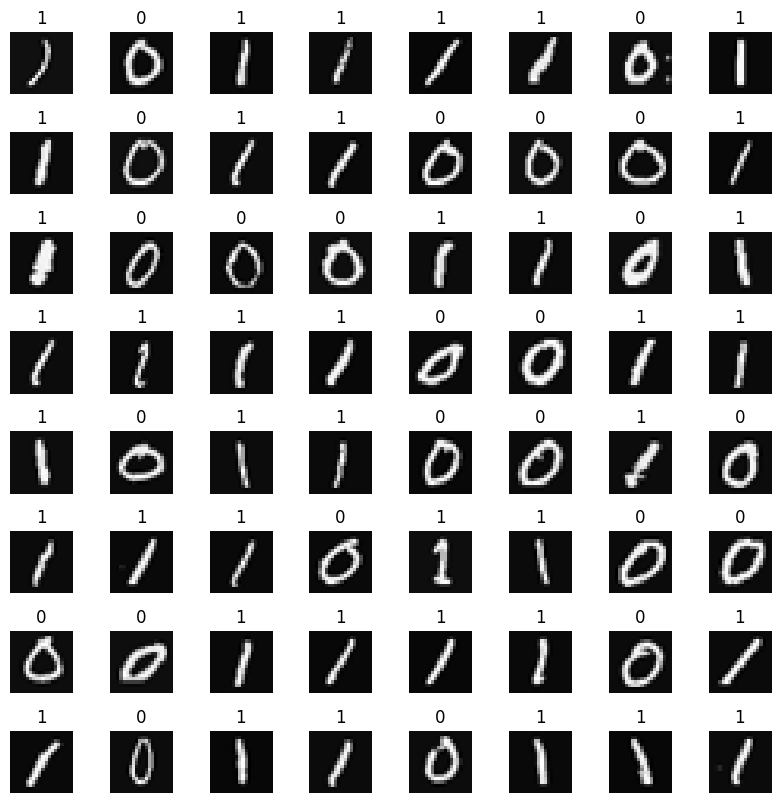

In [5]:
#kod koji nam sluzi za vizualizirati ucitane podatke

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [3]:
#izrada neuronske mreze s 3 sloja

model = Sequential(
    [        
              
        tf.keras.Input(shape=(400,)),   
        Dense(units = 25, activation = "relu"),
        Dense(units = 15, activation = "relu"),
        Dense(units = 1, activation = "sigmoid")

    ], name = "my_model" 
)                            


In [4]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

#treniranje parametara mreze
model.fit(
    X,y,
    epochs=20
)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.4020
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.1039
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0300
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0163
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 8/20
32/32 [==============================] - 0s 999us/step - loss: 0.0066
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 11/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 12/20
32/32 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 13/20
32/32 [============================

In [5]:
# model predvida vjerojatnost da je primjer broj 1
# primjer X[0] je 0, a primjer X[500] je 1

prediction = model.predict(X[0].reshape(1, 400))  
print(f" Vjerojatnost da je X[0] 1: {prediction}")
prediction = model.predict(X[500].reshape(1,400)) 
print(f" Vjerojatnost da je X[500] 1  {prediction}")

1/1 [==============================] - 0s 64ms/step
 Vjerojatnost da je X[0] 1: [[7.757225e-06]]
1/1 [==============================] - 0s 19ms/step
 Vjerojatnost da je X[500] 1  [[0.99991626]]


1/1 [==============================] - 0s 18ms/step


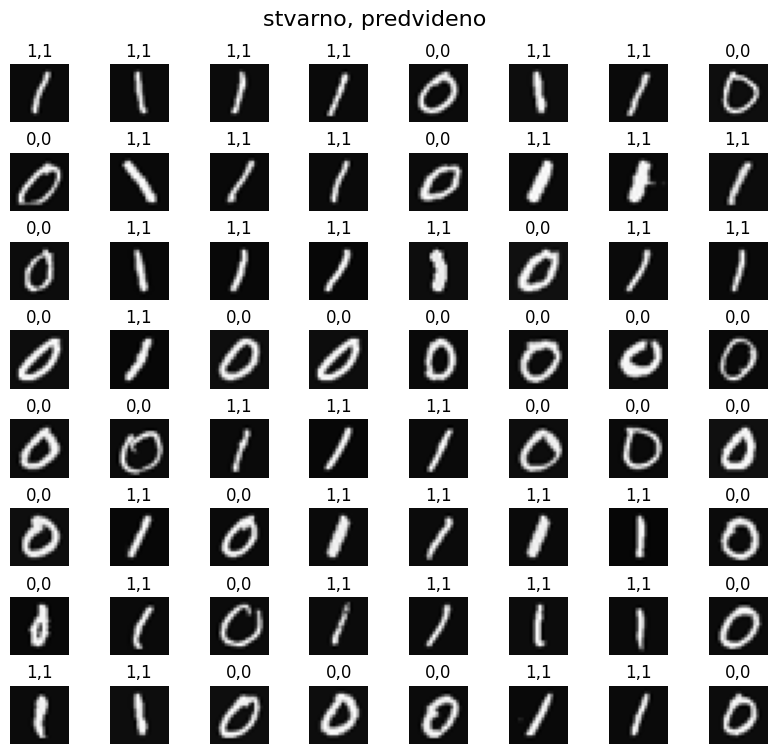

In [7]:
# kod koji nam omogucava da vizualiziramo prave vrijednosti i predvidene vrijednosti

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    if prediction >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("stvarno, predvideno", fontsize=16)
plt.show()